In [2]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.python.client import device_lib
# GPU 사용
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# CPU 사용
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# # CPU, GPU 사용 가능 여부 print
# print(device_lib.list_local_devices())

2025-03-21 14:49:41.325446: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-21 14:49:41.358157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-21 14:49:41.358192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-21 14:49:41.359161: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-21 14:49:41.365341: I tensorflow/core/platform/cpu_feature_guar

### model load


In [3]:
model = tf.keras.models.load_model('/home/chichi/S12P21C201/src/AI/model_h5/model')
model.summary()

2025-03-21 14:49:43.405120: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-03-21 14:49:43.405153: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: chichi
2025-03-21 14:49:43.405160: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: chichi
2025-03-21 14:49:43.405260: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.183.1
2025-03-21 14:49:43.405277: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.183.1
2025-03-21 14:49:43.405281: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.183.1


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

### 테스트 이미지 불러오기

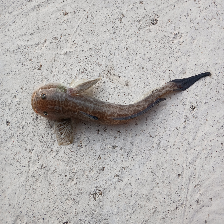

In [4]:
test1_img = tf.keras.preprocessing.image.load_img('/home/chichi/S12P21C201/src/AI/dataset/test_data/rn_image_picker_lib_temp_2ea0e1db-484b-4372-87cb-08bd7e31641b.jpg', 
                                            target_size=(224, 224))
img1_array = tf.keras.preprocessing.image.img_to_array(test1_img)
img1_array = np.array([img1_array]) 
img1_array = preprocess_input(img1_array)
test1_img

In [5]:
class_names = ['감성돔', '벵에돔', '참돔', '복섬', '문어', '돌돔', '주꾸미', '성대', '문절망둑', '갑오징어', '노래미', '독가시치', '전갱이', '망상어', '고등어', '무늬오징어', '볼락', '광어', '우럭', '붕장어', '갈치', '양태', '숭어', '삼치', '학공치', '농어']


# generate predictions for samples
predictions = model.predict(img1_array)
print(predictions)

# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

# transform classes number into classes name|
print("모델 예측: ", class_names[class_id.item()])


1/1 [==============================] - 1s 645ms/step
[[1.0439588e-04 6.8913309e-06 1.0553488e-05 1.6494820e-06 4.9374722e-07
  8.7492417e-08 2.4982414e-08 4.9823655e-05 9.8035800e-01 7.4511845e-06
  4.8509715e-05 1.3162385e-06 1.4735383e-04 1.5152241e-04 5.3016297e-06
  3.8741319e-07 4.1089029e-10 2.1254066e-06 3.2116121e-05 8.2785723e-04
  2.7765327e-06 1.8066647e-02 3.8757698e-05 2.5451452e-06 8.1630067e-05
  5.1896619e-05]]
[8]
모델 예측:  문절망둑


In [ ]:
test2_img = tf.keras.preprocessing.image.load_img('/home/chichi/S12P21C201/src/AI/dataset/test_data/rn_image_picker_lib_temp_e1ab5ca8-7567-430f-a1d9-7f61d33965f0.jpg', 
                                            target_size=(224, 224))
img2_array = tf.keras.preprocessing.image.img_to_array(test2_img)
img2_array = np.array([img2_array])
img2_array = preprocess_input(img2_array)

[[[[152. 142. 133.]
   [145. 132. 124.]
   [161. 152. 145.]
   ...
   [140. 124. 108.]
   [128. 112.  87.]
   [101.  84.  66.]]

  [[140. 127. 119.]
   [163. 150. 141.]
   [148. 141. 135.]
   ...
   [111.  98.  82.]
   [124. 111.  92.]
   [103.  86.  68.]]

  [[138. 130. 127.]
   [123. 112. 106.]
   [164. 155. 148.]
   ...
   [138. 126. 110.]
   [ 89.  63.  50.]
   [115. 101.  88.]]

  ...

  [[  8.   8.   8.]
   [ 11.  12.  14.]
   [ 12.  14.  11.]
   ...
   [111. 112. 116.]
   [ 87.  91. 100.]
   [ 86.  87.  92.]]

  [[ 10.  10.  10.]
   [ 13.  14.  16.]
   [ 16.  17.  19.]
   ...
   [133. 139. 151.]
   [122. 126. 129.]
   [118. 118. 116.]]

  [[ 12.  12.  12.]
   [ 17.  19.  18.]
   [ 16.  20.  21.]
   ...
   [130. 134. 135.]
   [140. 139. 135.]
   [156. 152. 143.]]]]
[[[[  29.060997    25.221       28.32     ]
   [  20.060997    15.221001    21.32     ]
   [  41.060997    35.221       37.32     ]
   ...
   [   4.060997     7.2210007   16.32     ]
   [ -16.939003    -4.7789993    4.

In [7]:

# generate predictions for samples
predictions = model.predict(img2_array)
print("Class id 별 확률: \n",predictions)

# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print("Class id: ", class_id)

# transform classes number into classes name
print("모델 예측: ", class_names[class_id.item()])

1/1 [==============================] - 0s 84ms/step
Class id 별 확률: 
 [[1.0250696e-01 8.4796576e-03 5.3820447e-03 5.1903992e-04 2.5756824e-05
  6.5431916e-03 1.8235511e-04 6.7313355e-05 1.1897074e-03 1.9767690e-04
  1.1286479e-02 9.8340511e-02 8.9316135e-03 2.1036312e-02 1.5992830e-04
  5.5975965e-03 1.1829087e-03 6.0156040e-04 7.1398187e-03 2.2539360e-04
  1.2562702e-04 4.0654992e-03 5.1648952e-03 8.3270390e-03 1.1784710e-03
  7.0154274e-01]]
Class id:  [25]
모델 예측:  농어
